#**MSC DISSERTATION**

###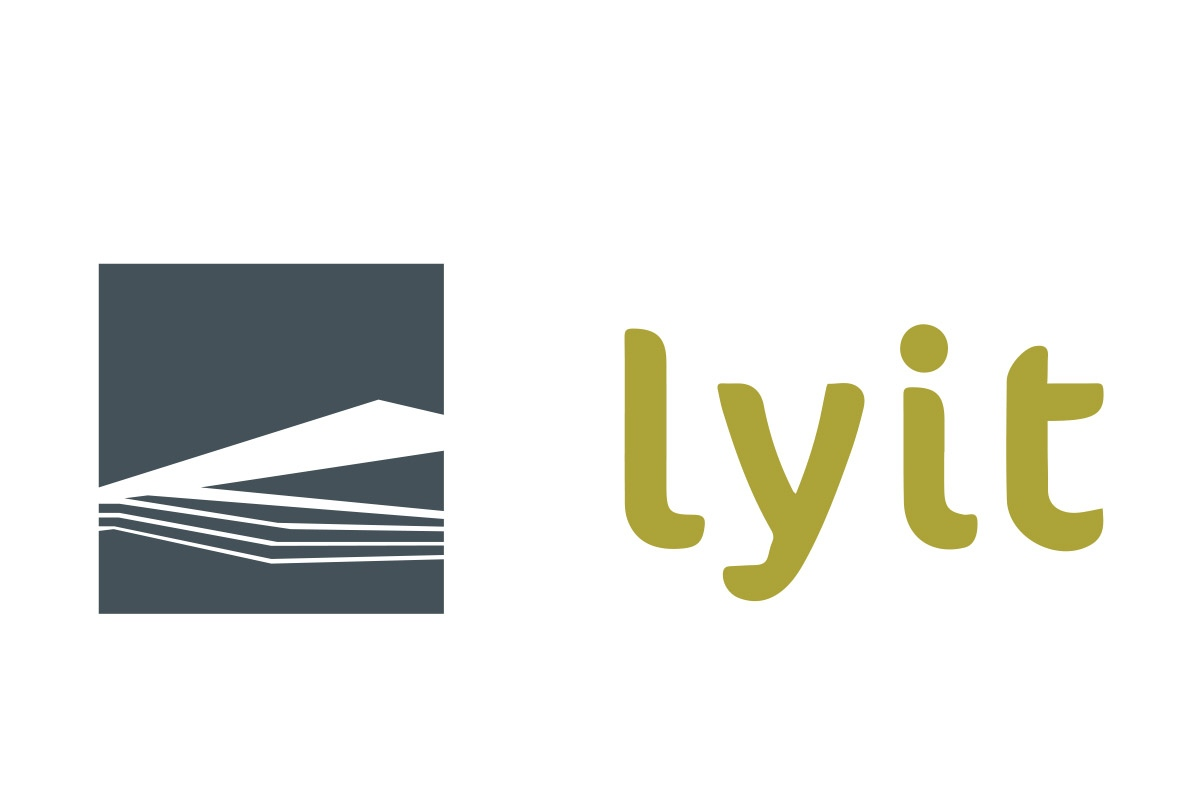
##**Name:** *KUMAR SAURABH*
##**Course:** *MSC IN BIG DATA ANALYTICS AND ARTIFICIAL INTELLIGENCE*
##**Institute:** *LETTERKENNY INSTITUTE OF TECHNOLOGY*
##**Supervisor:** *DR. GARY CULLEN*


## **The code blocks has been created with the help of some of the codes listed below:**

*1. https://www.kaggle.com/blessondensil294/twitter-tweets-extracting-using-tweepy*

*2. https://github.com/AayushTyagi1/Bot-Detection*

*3. https://github.com/RohanBhirangi/Twitter-Bot-Detection*

## **INSTALLING TWEEPY LIBRARY**

In [ ]:
!pip install tweepy

## **IMPORTING REQUIRED LIBRARIES**

In [2]:
import tweepy
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale, normalize
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler    
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet

## **TWITTER CREDENTIALS (PRIVATE)**

In [2]:
#Below are private confidential keys to access data from Twitter
consumer_key = 'FSv4tGHZ5l6krxt1oA8KUIduS'
consumer_secret = 'b2Bkrj3qZxlHtcaxd0Qwjq4l4L46dPwjLirO3oyclWGur4DmqT'
access_token = '64354066-41r3naQ7DQbzCEeE0gh9VKlSMYDUuM0tnDw2p4T5a'
access_secret = '6Lc6hzWyqEEMP4csf9LAC8byHnqo0nR9pa0J0daztpkuJ'

In [3]:
#Code block to assign consumer key and access key to extract data from twitter
auth_key = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth_key.set_access_token(access_token, access_secret)
api = tweepy.API(auth_key)

## ***The code blocks below are for collecting tweets from Twitter.***

*https://github.com/RohanBhirangi/Twitter-Bot-Detection*
*https://github.com/AayushTyagi1/Bot-Detection*

### **GATHERING BOT TWEETS**


In [4]:
# Define blank dataframe to assign values later
bot_tweets = []

In [5]:
# Here we are extracting bot tweets. We have used bot keyword to take out data which are bot are assumed as bot account
# Date is mentioned to take out tweets from particular date. The tweepy by default extract data from the recent day.
# Tweets_count assign the total number of tweets extracted at a time. 
# q denotes the keyword to be searched
# similarly if someone has to search using the ID of a person, api.search is replaced by api.user_timeline and q will be replaced by id.
date = '2021-08-29'
tweets_count = 2000

In [6]:
# Cursor method is used to take out data from Twitter using the Twitter credentials mentioned above
# q will search for tweets and data with the keyword assigned to it.
tweets = tweepy.Cursor(api.search, q = 'bot', lang="en", since = date).items(tweets_count)

In [7]:
for tweet in tweets:
    bot_tweets.append([tweet.user.screen_name,tweet.id,tweet.user.location,tweet.text,tweet.retweet_count,tweet.created_at,tweet.lang,tweet.user.friends_count,tweet.user.followers_count,tweet.user.listed_count,tweet.user.favourites_count,tweet.user.statuses_count,tweet.user.verified,tweet.user.has_extended_profile])

In [8]:
bot_df_Tweet = pd.DataFrame(bot_tweets)
bot_df_Tweet.to_csv('Twitter_Bot_Tweets.csv', header=["User_Name","ID","Location","Tweets","Retweets Count","Time Created","Language","Friends Count","Followers Count","Listed Count","Favorite Count","Status Count","Verified","Extended Profile"], index=False)

In [ ]:
# This code block needs to be run when reading data from local source
bot_df_Modified = pd.read_csv("Twitter_Bot_Tweets.csv")

In [ ]:
bot_df_Modified

In [ ]:
bot_df_Modified = bot_df_Modified[["Friends Count","Followers Count","Listed Count","Favorite Count","Status Count","Verified","Extended Profile"]]
bot_df_Modified

### **GATHERING OLYMPICS TWEETS**


### ***Olympics was one of the hot topic during July-August 2021. So, I have used keyword Olympics to collect human accounts data from twitter.***

In [16]:
# Define blank dataframe as olympics_tweets to assign olympics data later
olympics_tweets = []

In [17]:
# Here we have used keyword olympics to extract all the olympics related tweets on specific date.
# Tweet count has been set to 1000. 
date = '2021-08-29'
tweets_count = 2000

In [18]:
tweets = tweepy.Cursor(api.search, q = 'olympics', lang="en", since = date).items(tweets_count)

In [19]:
for tweet in tweets:
    olympics_tweets.append([tweet.user.screen_name,tweet.id,tweet.user.location,tweet.text,tweet.retweet_count,tweet.created_at,tweet.lang,tweet.user.friends_count,tweet.user.followers_count,tweet.user.listed_count,tweet.user.favourites_count,tweet.user.statuses_count,tweet.user.verified,tweet.user.has_extended_profile])

In [20]:
olympics_df_Tweet = pd.DataFrame(olympics_tweets)
olympics_df_Tweet.to_csv('Twitter_Olympics_Data.csv', header=["User_Name","ID","Location","Tweets","Retweets Count","Time Created","Language","Friends Count","Followers Count","Listed Count","Favorite Count","Status Count","Verified","Extended Profile"], index=False)

In [ ]:
olympics_df_Modified = pd.read_csv("Twitter_Real_Data.csv")
olympics_df_Modified

In [ ]:
olympics_df_Modified = olympics_df_Modified[["Friends Count","Followers Count","Listed Count","Favorite Count","Status Count","Verified","Extended Profile"]]
olympics_df_Modified

### **GATHERING USER DATA**


In [60]:
user_tweets = []

In [62]:
date = '2021-08-30'
tweets_count = 100
tweets = tweepy.Cursor(api.user_timeline, id = 'virendersehwag', lang="en", since = date).items(tweets_count)

In [63]:
for tweet in tweets:
    user_tweets.append([tweet.user.screen_name,tweet.id,tweet.user.location,tweet.text,tweet.retweet_count,tweet.created_at,tweet.lang,tweet.user.friends_count,tweet.user.followers_count,tweet.user.listed_count,tweet.user.favourites_count,tweet.user.statuses_count,tweet.user.verified,tweet.user.has_extended_profile])

In [64]:
user_df_Tweet = pd.DataFrame(user_tweets)
user_df_Tweet.to_csv('Twitter_User_Tweets.csv', header=["User_Name","ID","Location","Tweets","Retweets Count","Time Created","Language","Friends Count","Followers Count","Listed Count","Favorite Count","Status Count","Verified","Extended Profile"], index=False)

In [59]:
# This code block is to get details of a user. We just have to change the username.
username = "harshit250390"

username = api.get_user(username)
details = username.time_zone
  
print("The requested details of the user is : ", details)

The requested details of the user is :  None


### **GATHERING COVID TWEETS**

### ***Covid has been a topic to about for everyone since March 2020. I have used 'Covid' keyword to extract Covid data from Twitter.***

In [12]:
# Define blank dataframe to add covid related tweets and data in the dataframe.
covid_tweets = []

In [13]:
date = '2021-08-29'
tweets_count = 2000

In [14]:
tweets = tweepy.Cursor(api.search, q = 'covid', lang="en", since = date).items(tweets_count)

In [15]:
for tweet in tweets:
    covid_tweets.append([tweet.user.screen_name,tweet.id,tweet.user.location,tweet.text,tweet.retweet_count,tweet.created_at,tweet.lang,tweet.user.friends_count,tweet.user.followers_count,tweet.user.listed_count,tweet.user.favourites_count,tweet.user.statuses_count,tweet.user.verified,tweet.user.has_extended_profile])

In [16]:
covid_df_Tweet = pd.DataFrame(covid_tweets)
covid_df_Tweet.to_csv('Twitter_Covid_Data.csv', header=["User_Name","ID","Location","Tweets","Retweets Count","Time Created","Language","Friends Count","Followers Count","Listed Count","Favorite Count","Status Count","Verified","Extended Profile"], index=False)

In [ ]:
covid_df_Modified = pd.read_csv("Twitter_Covid_Data.csv")
covid_df_Modified

In [ ]:
covid_df_Modified = covid_df_Modified[["Friends Count","Followers Count","Listed Count","Favorite Count","Status Count","Verified","Extended Profile"]]
covid_df_Modified

### **GATHERING VACCINE TWEETS**

In [57]:
vaccine_tweets = []

In [58]:
date = '2021-08-29'
tweets_count = 2000

In [59]:
tweets = tweepy.Cursor(api.search, q = 'vaccine', lang="en", since = date).items(tweets_count)

In [60]:
for tweet in tweets:
    vaccine_tweets.append([tweet.user.screen_name,tweet.id,tweet.user.location,tweet.text,tweet.retweet_count,tweet.created_at,tweet.lang,tweet.user.friends_count,tweet.user.followers_count,tweet.user.listed_count,tweet.user.favourites_count,tweet.user.statuses_count,tweet.user.verified,tweet.user.has_extended_profile])

In [62]:
vaccine_df_Tweet = pd.DataFrame(vaccine_tweets)
vaccine_df_Tweet.to_csv('Twitter_Vaccine_Data.csv', header=["User_Name","ID","Location","Tweets","Retweets Count","Time Created","Language","Friends Count","Followers Count","Listed Count","Favorite Count","Status Count","Verified","Extended Profile"], index=False)

In [ ]:
vaccine_df_Modified = pd.read_csv("Twitter_Vaccine_Data.csv")
vaccine_df_Modified

In [ ]:
vaccine_df_Modified = vaccine_df_Modified[["Friends Count","Followers Count","Listed Count","Favorite Count","Status Count","Verified","Extended Profile"]]
vaccine_df_Modified

# **NOTE: We have to manually upload *Combined.csv* and *Twitter_Bot_Data.csv* file now from local directory to run code blocks ahead of this section.**

### ***Combined datasets***

In [16]:
# Reading combined dataset from local path
combined_df = pd.read_csv('Combined.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


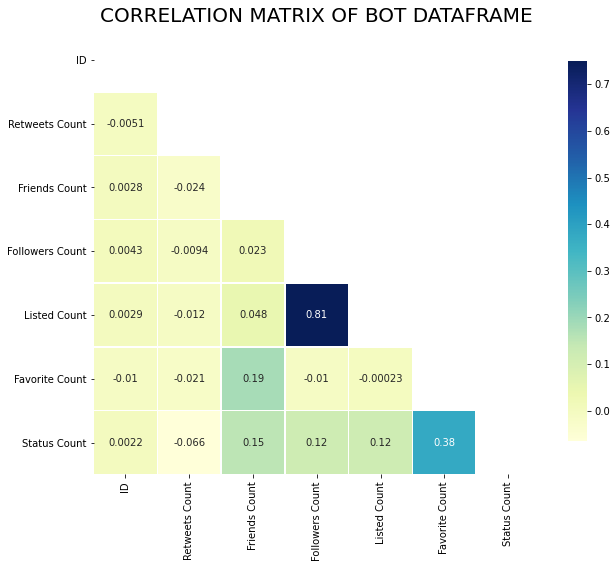

In [17]:
# Plotting Correlation Matrix
col_names = ['ID', 'Retweets Count', 'Friends Count', 'Followers Count', 'Listed Count', 'Favorite Count', 'Status Count']

mask = np.zeros_like(combined_df[col_names].corr(), dtype = np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(10, 10))
plt.title('CORRELATION MATRIX OF BOT DATAFRAME',fontsize=20)

sns.heatmap(combined_df[col_names].corr(),linewidths = 0.5,vmax = 0.75,square = True,cmap = "YlGnBu", 
            linecolor = 'w',annot = True,annot_kws = {"size":10},mask = mask,cbar_kws = {"shrink": 0.7})

In [18]:
# Using only columns that we need and removing non-numerical columns
combined_df = combined_df[["Friends Count","Followers Count","Listed Count","Favorite Count","Status Count","Verified","Extended Profile","Bot"]]
# Removing NaN
combined_df = combined_df.dropna()
combined_df

,Friends Count,Followers Count,Listed Count,Favorite Count,Status Count,Verified,Extended Profile,Bot
0,749.0,722.0,2.0,6153.0,35008.0,False,True,0.0
1,607.0,287.0,4.0,101385.0,73367.0,False,False,0.0
2,1022.0,1031.0,23.0,30884.0,37151.0,False,False,0.0
3,40.0,11.0,1.0,147.0,623.0,False,False,0.0
4,401.0,194.0,0.0,3118.0,19499.0,False,True,0.0
...,...,...,...,...,...,...,...,...
68573,307.0,283.0,8.0,35167.0,30041.0,False,False,1.0
68574,204.0,60.0,0.0,24350.0,1520.0,False,False,1.0
68575,313.0,2632.0,7.0,1813.0,1003.0,False,True,1.0
68576,0.0,4.0,2.0,0.0,40717.0,False,False,1.0


In [6]:
print("The summary of dataset is : \n")
combined_df.sum(axis=0, skipna = True)

The summary of dataset is : 



Friends Count       8.718272e+07
Followers Count     1.050442e+09
Listed Count        5.071152e+06
Favorite Count      2.534315e+09
Status Count        3.975708e+09
Verified            1.368000e+03
Extended Profile    3.642800e+04
Bot                 2.000000e+04
dtype: float64

In [ ]:
# For shuffling of data
combined_df = combined_df.sample(frac=1)

In [7]:
combined_df_bot = combined_df['Bot']
combined_df_bot

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
68573    1.0
68574    1.0
68575    1.0
68576    1.0
68577    1.0
Name: Bot, Length: 68001, dtype: float64

In [19]:
# Describing the dataset
combined_df.describe()

,Friends Count,Followers Count,Listed Count,Favorite Count,Status Count,Bot
count,68001.000000,6.800100e+04,68001.000000,6.800100e+04,6.800100e+04,68001.000000
mean,1282.079940,1.544745e+04,74.574668,3.726880e+04,5.846543e+04,0.294113
std,5085.910043,4.173216e+05,1548.995422,8.243172e+04,1.284710e+05,0.455646
min,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000e+00,0.000000
25%,98.000000,5.400000e+01,0.000000,3.140000e+02,2.724000e+03,0.000000
50%,403.000000,2.720000e+02,1.000000,6.122000e+03,1.554500e+04,0.000000
75%,1180.000000,1.123000e+03,8.000000,3.605300e+04,5.763100e+04,1.000000
max,689319.000000,5.435129e+07,210372.000000,1.549803e+06,2.905164e+06,1.000000


### **CONFUSION MATRIX**

CONFUSION MATRIX



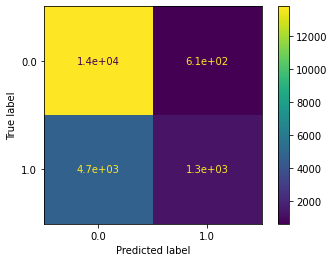

In [10]:
# Confusion Matrix using Support Vector with Test Size of 30%
print("CONFUSION MATRIX\n")
X = combined_df
y = combined_df_bot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=20)
con_mat = SVC(random_state=20)
con_mat.fit(X_train, y_train)

plot_confusion_matrix(con_mat, X_test, y_test)  
plt.show() 

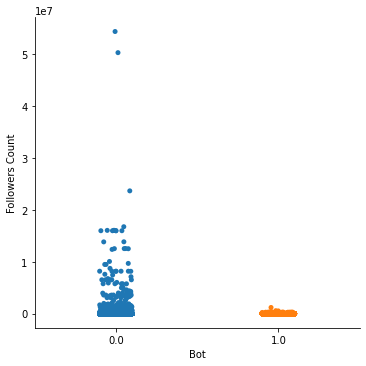

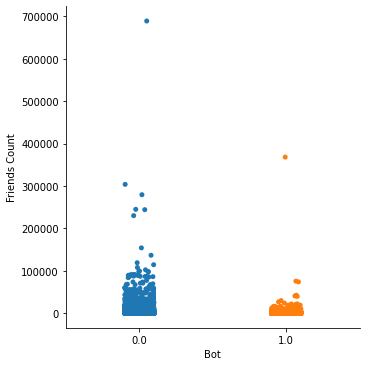

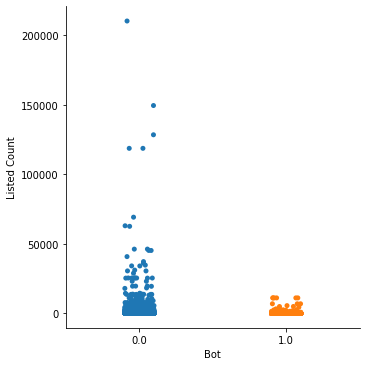

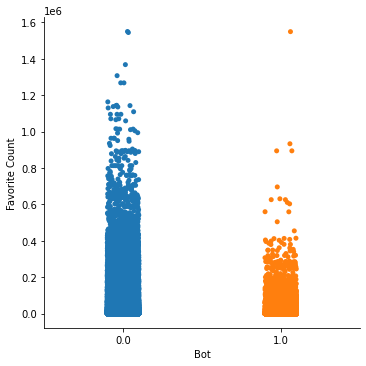

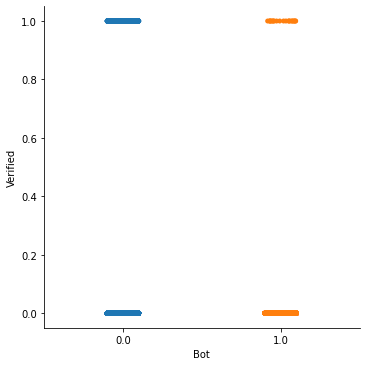

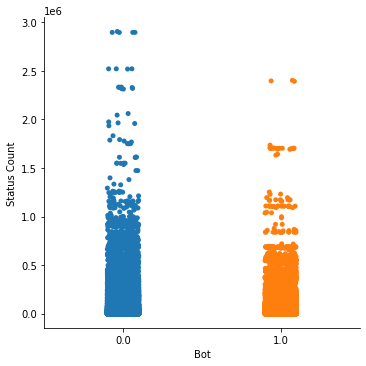

In [14]:
# Catplot of Bot vs Different variables
sns.catplot(x="Bot", y="Followers Count", data=combined_df);
sns.catplot(x="Bot", y="Friends Count", data=combined_df);
sns.catplot(x="Bot", y="Listed Count", data=combined_df);
sns.catplot(x="Bot", y="Favorite Count", data=combined_df);
sns.catplot(x="Bot", y="Verified", data=combined_df);
sns.catplot(x="Bot", y="Status Count", data=combined_df);

# **IMPLEMENTATION OF ALGORITHMS**

In [20]:
bot_data = combined_df['Bot'] 
bot_pred = list(set(list(combined_df.columns))-set(bot_data))
combined_df[bot_pred] = combined_df[bot_pred]/combined_df[bot_pred].max()

### **LINEAR, LASSO & RIDGE REGRESSION**

### ***Dividing data into training and test set***

In [21]:
X = combined_df[bot_pred].values
y = bot_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

# Printing the shape of train and test set
print("Train set :", X_train.shape); print("Test set :", X_test.shape)

Train set : (54400, 8)
Test set : (13601, 8)


### **LINEAR REGRESSION**

In [22]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print("**LINEAR REGRESSION**\n")
lin_reg_train= lin_reg.predict(X_train)
print("For Train Set :-")
print("Mean Squared Error :", np.sqrt(mean_squared_error(y_train,lin_reg_train)))
print("R2 Score :", r2_score(y_train, lin_reg_train))
print("ROC AUC Score :", roc_auc_score(y_train, lin_reg_train))
print("\n")
lin_reg_test= lin_reg.predict(X_test)
print("For Test Set :-")
print("Mean Squared Error :", np.sqrt(mean_squared_error(y_test,lin_reg_test))) 
print("R2 Score :", r2_score(y_test, lin_reg_test))
print("ROC AUC Score :", roc_auc_score(y_test, lin_reg_test))

**LINEAR REGRESSION**

For Train Set :-
Mean Squared Error : 2.6458729202838594e-16
R2 Score : 1.0
ROC AUC Score : 1.0


For Test Set :-
Mean Squared Error : 2.4665186712775476e-16
R2 Score : 1.0
ROC AUC Score : 1.0


### **RIDGE REGRESSION**

In [24]:
# Ridge Regression
ridge_reg = Ridge(alpha=0.05)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [25]:
print("**RIDGE REGRESSION**\n")
ridge_reg_train= ridge_reg.predict(X_train)
print("For Train Set :-")
print("Mean Squared Error :", np.sqrt(mean_squared_error(y_train,ridge_reg_train)))
print("R2 Score :", r2_score(y_train, ridge_reg_train))
print("ROC AUC Score :", roc_auc_score(y_train, ridge_reg_train))
print("\n")
ridge_reg_test= ridge_reg.predict(X_test)
print("For Test Set :-")
print("Mean Squared Error :", np.sqrt(mean_squared_error(y_test,ridge_reg_test))) 
print("R2 Score :", r2_score(y_test, ridge_reg_test))
print("ROC AUC Score :", roc_auc_score(y_test, ridge_reg_test))

**RIDGE REGRESSION**

For Train Set :-
Mean Squared Error : 2.1007969414580747e-06
R2 Score : 0.999999999978754
ROC AUC Score : 1.0


For Test Set :-
Mean Squared Error : 2.0995237049421526e-06
R2 Score : 0.9999999999787206
ROC AUC Score : 1.0


### **LASSO REGRESSION**

In [26]:
# Lasso Regression
lasso_reg = Lasso(alpha=0.05)
lasso_reg.fit(X_train, y_train) 

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [27]:
print("**LASSO REGRESSION**\n")
lasso_reg_train= lasso_reg.predict(X_train)
print("For Train Set :-")
print("Mean Squared Error :", np.sqrt(mean_squared_error(y_train,lasso_reg_train)))
print("R2 Score :", r2_score(y_train, lasso_reg_train))
print("ROC AUC Score: ", roc_auc_score(y_train, lasso_reg_train))
print("\n")
lasso_reg_test= lasso_reg.predict(X_test)
print("For Test Set :-")
print("Mean Squared Error :", np.sqrt(mean_squared_error(y_test,lasso_reg_test))) 
print("R2 Score :", r2_score(y_test, lasso_reg_test))
print("ROC AUC Score: ", roc_auc_score(y_test, lasso_reg_test))

**LASSO REGRESSION**

For Train Set :-
Mean Squared Error : 0.1097045549853881
R2 Score : 0.9420626494024391
ROC AUC Score:  1.0


For Test Set :-
Mean Squared Error : 0.10955240615137468
R2 Score : 0.9420621010369202
ROC AUC Score:  1.0


### **ELASTIC NET REGRESSION**

In [28]:
#Elastic Net
elastic_reg = ElasticNet(alpha = 0.05)
elastic_reg.fit(X_train, y_train)

ElasticNet(alpha=0.05, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [29]:
print("**ELASTIC NET REGRESSION**\n")
elastic_reg_train= elastic_reg.predict(X_train)
print("For Train Set :-")
print("Mean Squared Error :", np.sqrt(mean_squared_error(y_train,elastic_reg_train)))
print("R2 Score :", r2_score(y_train, elastic_reg_train))
print("ROC AUC Score :", roc_auc_score(y_train, elastic_reg_train))
print("\n")
elastic_reg_test= elastic_reg.predict(X_test)
print("For Test Set :-")
print("Mean Squared Error :", np.sqrt(mean_squared_error(y_test,elastic_reg_test)))
print("R2 Score :", r2_score(y_test, elastic_reg_test))
print("ROC AUC Score :", roc_auc_score(y_test, elastic_reg_test))

**ELASTIC NET REGRESSION**

For Train Set :-
Mean Squared Error : 0.09791981743223889
R2 Score : 0.9538416260123513
ROC AUC Score : 1.0


For Test Set :-
Mean Squared Error : 0.09778401280634066
R2 Score : 0.9538411891325072
ROC AUC Score : 1.0


### **DECISION TREE**

In [30]:
combined_df = pd.read_csv('Combined.csv')
# Using only columns that we need and removing non-numerical columns
combined_df = combined_df[["Friends Count","Followers Count","Listed Count","Favorite Count","Status Count","Verified","Extended Profile","Bot"]]
# Removing NaN
combined_df = combined_df.dropna()

combined_df_bot = combined_df['Bot']

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


CONFUSION MATRIX



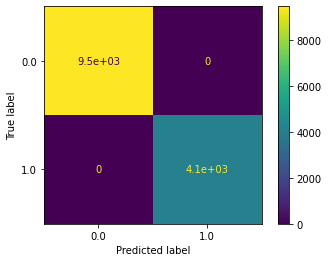

In [34]:
print("CONFUSION MATRIX\n")
X = combined_df.to_numpy()
Y = combined_df_bot.to_numpy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=0)
con_mat = tree.DecisionTreeClassifier()
con_mat = con_mat.fit(X, Y)

plot_confusion_matrix(con_mat, X_test, Y_test)  
plt.show() 

In [35]:
actual = np.array(combined_df_bot)
predicted = con_mat.predict(combined_df)
pred = np.array(predicted)

print("**DECISION TREE CLASSIFIER**\n")
accuracy = accuracy_score(actual, pred) * 100
precision = precision_score(actual, pred) * 100
recall = recall_score(actual, pred) * 100
f1 = f1_score(actual, pred) * 100
auc = roc_auc_score(actual, pred)
print('Accuracy is {:.2f}%\n\
Recall is {:.2f}%\n\
Precision is {:.2f}%\n\
F1 Score is {:.2f}\n\
Area Under Curve is {:.4f}'.format(accuracy, precision, recall, f1, auc))

cls = classification_report(actual, pred)
print('\nClassification Report: \n', cls)

**DECISION TREE CLASSIFIER**

Accuracy is 100.00%
Recall is 100.00%
Precision is 100.00%
F1 Score is 100.00
Area Under Curve is 1.0000

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     48001
         1.0       1.00      1.00      1.00     20000

    accuracy                           1.00     68001
   macro avg       1.00      1.00      1.00     68001
weighted avg       1.00      1.00      1.00     68001



**AUC Graph**



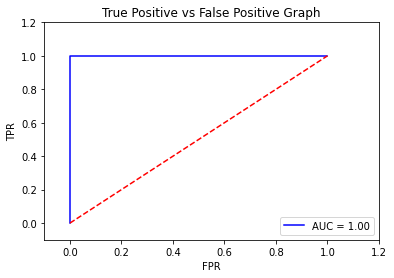

In [36]:
print("**AUC Graph**\n")
fpr, tpr, thresholds = metrics.roc_curve(actual, pred)
auc = metrics.auc(fpr, tpr)
plt.title('True Positive vs False Positive Graph')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

### **LOGISTIC REGRESSION**

In [37]:
combined_df = pd.read_csv('Combined.csv')
# Using only columns that we need and removing non-numerical columns
combined_df = combined_df[["Friends Count","Followers Count","Listed Count","Favorite Count","Status Count","Verified","Extended Profile","Bot"]]
# Removing NaN
combined_df = combined_df.dropna()

# Taking out Bot column
combined_df_bot = combined_df['Bot']

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


CONFUSION MATRIX



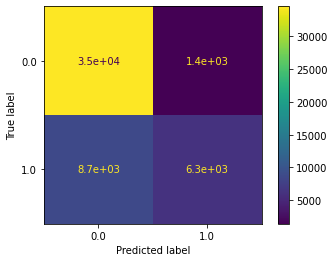

In [40]:
train_X, test_X, train_Y, test_Y = train_test_split(combined_df, combined_df_bot, test_size=0.25, random_state=1)

X = train_X.to_numpy()
Y = train_Y.to_numpy()
con_mat = LogisticRegression()
con_mat = con_mat.fit(X, Y)
print("CONFUSION MATRIX\n")
plot_confusion_matrix(con_mat, X, Y)  
plt.show()

In [41]:
print("**LOGISTIC REGRESSION**\n")
logreg = LogisticRegression().fit(X, Y)

actual = np.array(test_Y)
predicted = logreg.predict(test_X)
pred = np.array(predicted)

accuracy = accuracy_score(actual, pred) * 100
precision = precision_score(actual, pred) * 100
recall = recall_score(actual, pred) * 100
f1 = f1_score(actual, pred)
auc = roc_auc_score(actual, pred)
print('Accuracy is {:.2f}%\n\
Precision is {:.2f}%\n\
Recall is {:.2f}%\n\
F1 Score is {:.2f}\n\
Area Under Curve is {:.2f}'.format(accuracy, precision, recall, f1, auc))

cls = classification_report(test_Y, pred)
print('\nClassification Report: \n', cls)


**LOGISTIC REGRESSION**

Accuracy is 80.41%
Precision is 82.38%
Recall is 42.14%
F1 Score is 0.56
Area Under Curve is 0.69

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.80      0.96      0.87     12020
         1.0       0.82      0.42      0.56      4981

    accuracy                           0.80     17001
   macro avg       0.81      0.69      0.72     17001
weighted avg       0.81      0.80      0.78     17001



AUC Graph



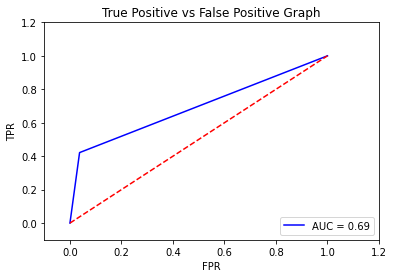

In [42]:
print("AUC Graph\n")
fpr, tpr, thresholds = metrics.roc_curve(actual, pred)
auc = metrics.auc(fpr, tpr)
plt.title('True Positive vs False Positive Graph')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

### **K FOLD**

In [43]:
combined_df = pd.read_csv('Combined.csv')
# Taking out columns which has numerical values and leaving other columns from the combined twitter dataset
combined_df = combined_df[["Friends Count","Followers Count","Listed Count","Favorite Count","Status Count","Verified","Extended Profile","Bot"]]
# Removing NaN
combined_df = combined_df.dropna()

# Taking out Bot column
combined_df_bot = combined_df['Bot']

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [44]:
kf = KFold(n_splits = 10) # 10 is considered as ideal splits in K-Fold

X = combined_df.to_numpy()
Y = combined_df_bot.to_numpy()

i = 0
for train_indices, test_indices in kf.split(X):
    i += 1
    train_X = X[train_indices, :]
    train_Y = Y[train_indices]
    test_X = X[test_indices, :]
    test_Y = Y[test_indices]
    #logreg = LogisticRegression().fit(train_X, train_Y)
    pred = logreg.predict(test_X)
    
    accuracy = accuracy_score(test_Y, pred) * 100
    precision = precision_score(test_Y, pred) * 100
    recall = recall_score(test_Y, pred) * 100

    print('For split {}'.format(i))
    print('Accuracy is {:.2f}%\nPrecision is {:.2f}%\nRecall is {:.2f}\n'.format(accuracy, precision, recall))
    
    cls = classification_report(test_Y, pred)
    print('Classification Report: \n', cls)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For split 1
Accuracy is 96.66%
Precision is 0.00%
Recall is 0.00

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      6801
         1.0       0.00      0.00      0.00         0

    accuracy                           0.97      6801
   macro avg       0.50      0.48      0.49      6801
weighted avg       1.00      0.97      0.98      6801

For split 2
Accuracy is 58.94%
Precision is 95.84%
Recall is 41.10

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.44      0.96      0.60      2199
         1.0       0.96      0.41      0.58      4601

    accuracy                           0.59      6800
   macro avg       0.70      0.69      0.59      6800
weighted avg       0.79      0.59      0.58      6800

For split 3
Accuracy is 86.19%
Precision is 80.67%
Recall is 43.25

Classification Report: 
               precision    recall  f1-score   support

         0.0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


CONFUSION MATRIX



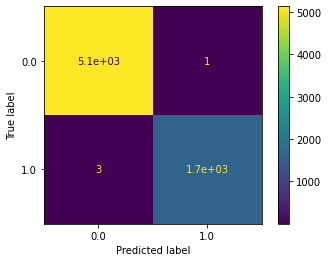

In [45]:
con_mat = con_mat.fit(test_X, pred)
print("CONFUSION MATRIX\n")
plot_confusion_matrix(con_mat, test_X, pred)  
plt.show()

### **NAIVE BAISE**

In [46]:
combined_df = pd.read_csv('Combined.csv')
# Taking out columns which has numerical values and leaving other columns from the combined twitter dataset
combined_df = combined_df[["Friends Count","Followers Count","Listed Count","Favorite Count","Status Count","Verified","Extended Profile","Bot"]]
# Removing NaN
combined_df = combined_df.dropna()

# Taking out Bot column
combined_df_bot = combined_df['Bot']

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
combined_df = normalize(combined_df)

In [48]:
nb = GaussianNB().fit(combined_df, combined_df_bot.to_numpy())

In [49]:
actual = np.array(combined_df_bot)
predicted = nb.predict(combined_df)
pred = np.array(predicted)

print("**NAIVE BAYES**\n")
accuracy = accuracy_score(actual, pred) * 100
precision = precision_score(actual, pred) * 100
recall = recall_score(actual, pred) * 100
f1 = f1_score(actual, pred)
auc = roc_auc_score(actual, pred)
print('Accuracy is {:.2f}%\n\
Precision is {:.2f}%\n\
Recall is {:.2f}%\n\
F1 Score is {:.2f}\n\
Area Under Curve is {:.2f}'.format(accuracy, precision, recall, f1, auc))

cls = classification_report(combined_df_bot, pred)
print('Classification Report: \n', cls)

**NAIVE BAISE**

Accuracy is 85.56%
Precision is 94.77%
Recall is 53.86%
F1 Score is 0.69
Area Under Curve is 0.76
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.84      0.99      0.91     48001
         1.0       0.95      0.54      0.69     20000

    accuracy                           0.86     68001
   macro avg       0.89      0.76      0.80     68001
weighted avg       0.87      0.86      0.84     68001



CONFUSION MATRIX



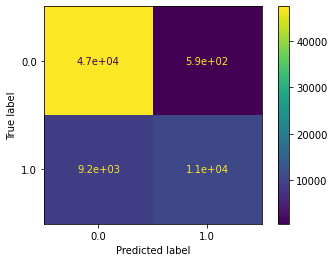

In [50]:
con_mat = GaussianNB()
con_mat = con_mat.fit(combined_df, combined_df_bot)
print("CONFUSION MATRIX\n")
plot_confusion_matrix(con_mat, combined_df, combined_df_bot)
plt.show()

AUC Graph



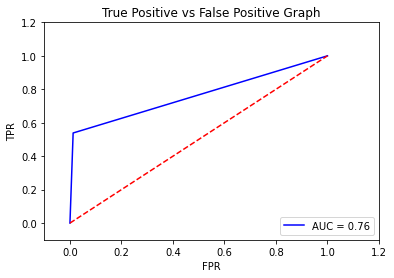

In [51]:
print("AUC Graph\n")
fpr, tpr, thresholds = metrics.roc_curve(actual, pred)
auc = metrics.auc(fpr, tpr)
plt.title('True Positive vs False Positive Graph')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

### **XG Boost**

In [52]:
# Read the data for train and test set
train_data = pd.read_csv("Combined.csv")
train_data = train_data[["Favorite Count","Bot"]]
train_data = train_data.dropna()

test_data = pd.read_csv("Twitter_Bot_Data.csv")
test_data = test_data[["Favorite Count","Bot"]]
test_data = test_data.dropna()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [53]:
#Seperate the independent and target variable on training data
train_x = train_data.drop(columns=['Bot'],axis=1)
train_y = train_data['Bot']

test_x = test_data.drop(columns=['Bot'],axis=1)
test_y = test_data['Bot']

print('Shape of training data :',train_data.shape)
print('Shape of testing data :',test_data.shape)

Shape of training data : (68001, 2)
Shape of testing data : (20000, 2)


In [54]:
model = XGBClassifier() # Define XGB classifier

#Fitting the XGB classifier to our dataset
model.fit(train_x,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [55]:
#Predict the target on the train dataset
predict_train = model.predict(train_x)
print('Target on train data',predict_train) 

#Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('\nAccuracy score on train dataset: ',accuracy_train)


Target on train data [0. 0. 0. ... 0. 1. 0.]

Accuracy score on train dataset:  0.8135174482728195


In [56]:
#Predict the target on the test dataset
predict_test = model.predict(test_x)
print('Target on test data',predict_test)

#Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('\nAccuracy score on test dataset: ',accuracy_test)

Target on test data [1. 0. 1. ... 0. 1. 1.]

Accuracy score on test dataset:  0.5553


CONFUSION MATRIX



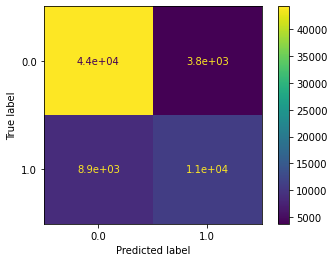

In [57]:
con_mat = XGBClassifier()
con_mat = con_mat.fit(train_x, train_y)
print("CONFUSION MATRIX\n")
plot_confusion_matrix(con_mat, train_x, train_y)
plt.show()

### **RANDOM FOREST**

In [58]:
#Importing datasets  
train_set = pd.read_csv('Combined.csv')
train_set = train_set.dropna()

test_set = pd.read_csv('Twitter_Bot_Data.csv')
test_set = test_set.dropna()

  
#Extracting Independent and dependent Variable  

x= train_set.iloc[:6999, [4,7,8]].values
y= test_set.iloc[:6999, [12]].values
  
#Splitting the dataset into training and test set.  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state=0)
  
#Feature Scaling  
std_scale = StandardScaler()
x_train= std_scale.fit_transform(x_train)
x_test= std_scale.transform(x_test)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [59]:
#Fitting Random Forest classifier to the training set  
classifier= RandomForestClassifier(n_estimators= 100, criterion="entropy")  
classifier.fit(x_train, y_train) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)

In [69]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n")
print(cm)

acc = accuracy_score(y_test,y_pred)
print("\nAccuracy:",acc)

cls = classification_report(y_test, y_pred)
print("Classification Report:\n", cls)


Confusion Matrix:

[[2094    0]
 [   6    0]]

Accuracy: 0.9971428571428571
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      2094
        True       0.00      0.00      0.00         6

    accuracy                           1.00      2100
   macro avg       0.50      0.50      0.50      2100
weighted avg       0.99      1.00      1.00      2100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CONFUSION MATRIX



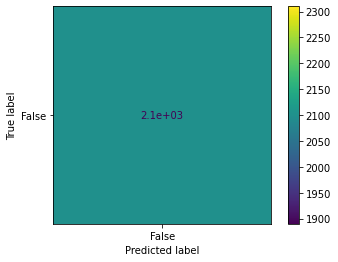

In [70]:
con_mat = RandomForestClassifier()
con_mat = con_mat.fit(y_test, y_pred)
print("CONFUSION MATRIX\n")
plot_confusion_matrix(con_mat, y_test, y_pred)
plt.show()

### **SYSTEM CONFIGURATION**

In [1]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   37G   71G  35% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.9G     0  5.9G   0% /dev/shm
tmpfs           6.4G   28K  6.4G   1% /var/colab
/dev/sda1        76G   42G   35G  55% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [2]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0x1
cpu MHz		: 2000.180
cache size	: 39424 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	:

In [3]:
!cat /proc/meminfo

MemTotal:       13302928 kB
MemFree:        10603360 kB
MemAvailable:   12515200 kB
Buffers:          119780 kB
Cached:          1933332 kB
SwapCached:            0 kB
Active:           983228 kB
Inactive:        1472192 kB
Active(anon):     371636 kB
Inactive(anon):      432 kB
Active(file):     611592 kB
Inactive(file):  1471760 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:             13240 kB
Writeback:             0 kB
AnonPages:        402260 kB
Mapped:           237408 kB
Shmem:              1140 kB
KReclaimable:     139928 kB
Slab:             183888 kB
SReclaimable:     139928 kB
SUnreclaim:        43960 kB
KernelStack:        4704 kB
PageTables:         5472 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6651464 kB
Committed_AS:    3012900 kB
VmallocTotal:   34359738367 kB
VmallocUsed:        7060 kB
VmallocChunk:          0 kB
Percpu:          

## **END OF CODING BLOCK**